# RF

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [2]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [3]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [4]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [6]:
# Define the classifier and the parameter grid for the grid search
clf = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None,10, 20, 30]
}

In [7]:
# Define the scoring function
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=mcc_scorer, return_train_score=True)

# Perform the grid search
grid_search.fit(X, y)

# Save the best model
joblib.dump(grid_search.best_estimator_, "RFbest_model.pkl")

# Calculate MCC values and standard deviation for each set of parameters
mcc_values = grid_search.cv_results_['mean_test_score']
mcc_std = grid_search.cv_results_['std_test_score']

# Get best parameters
best_params = grid_search.best_params_

#best_params, mcc_values, mean(mcc_std)


In [8]:
best_params

{'max_depth': None, 'n_estimators': 50}

In [9]:
mcc_mean = np.mean(mcc_values)
mcc_mean

0.3454707740886453

In [10]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.08776324963709375

In [11]:
# Save the best model
joblib.dump(grid_search.best_estimator_, "RFbest_model.pkl")


['RFbest_model.pkl']

In [12]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.08776324963709375

In [13]:
mcc_std_mean

0.08776324963709375

In [14]:
# Get best parameters

best_params = grid_search.best_params_


In [6]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [7]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [8]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [9]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [10]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import joblib

# Load the best model
best_model = joblib.load("RFbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Get the predicted probabilities
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score using probabilities
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_testdata, y_pred_proba)

# Calculate the AUC-PR
pr_auc_curve = auc(recall, precision)

# Calculate the Precision-Recall AUC (PR AUC) using average precision score
pr_auc_average = average_precision_score(y_testdata, y_pred_proba)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Accuracy:', accuracy)
print('MCC:', mcc)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)
print('PR AUC from curve:', pr_auc_curve)
print('PR AUC from average precision:', pr_auc_average)


Sensitivity: 0.6446280991735537
Specificity: 0.7975460122699386
Accuracy: 0.7323943661971831
MCC: 0.4481209605067215
F1 Score: 0.6724137931034483
ROC AUC: 0.8209450894894286
PR AUC from curve: 0.7430440670521743
PR AUC from average precision: 0.7427999268840162


In [84]:
# Load the CSV file
calibratedata = pd.read_csv('calibrateset_withVAEfeature.csv')
calibratedata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,A146A856,0,O=P(O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(...,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,J366,1,COc1cc(C)c2c(Oc3cccc(C(F)(F)F)c3)c(OC)cc([N+](...,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,J984,0,COc1ccc(Nc2ccc(CCNCC(O)c3ccc(O)c4[nH]c(=O)ccc3...,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,J1233,1,O=C(O)COc1cc(Cl)c(Cl)cc1Cl,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,J748,1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J719,0,COc1ncc(F)c2nc(S(=O)(=O)Nc3c(F)cccc3F)nn12,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,J1010,0,CN1C(=O)c2ccc3c4ccc5c6c(ccc(c7ccc(c2c37)C1=O)c...,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,J669,0,CCCCCCCCNC(=O)Nc1ccc(Cc2ccc(NC(=O)NCCCCCCCC)cc...,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,J923,1,CCCCCCCCCCCCCCCCCCCCBr,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [85]:
# Delete the "ID" and "Standard.SMILES" columns
calibratedata = calibratedata.drop(["ID", "SMILES"], axis=1)
calibratedata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,0,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,-0.891376,1.927723,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,1,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,-0.267281,2.702775,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,0,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,-1.223377,3.506333,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,1,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,-0.822144,1.483149,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,0.848040,1.241403,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,-0.029226,1.671207,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,0,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,6.999261,0.090455,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,0,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,-5.200621,3.133582,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,1,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,-1.870519,-0.432513,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [16]:
X_calibratedata = calibratedata.drop("label", axis=1)
y_calibratedata = calibratedata["label"]
y_calibratedata

0      0
1      1
2      0
3      1
4      1
      ..
279    0
280    0
281    0
282    1
283    1
Name: label, Length: 284, dtype: int64

In [26]:
# Encode the labels
le = LabelEncoder()
y_calibratedata = le.fit_transform(y_calibratedata)

In [27]:
y_calibratedata

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [19]:
X_train=X
y_train=y


X_calib=X_calibratedata
y_calib=y_calibratedata
X_test=X_testdata
y_test=y_testdata


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Split data into training, calibration and testing datasets
X_train=X
y_train=y


X_calib=X_calibratedata
y_calib=y_calibratedata
X_test=X_testdata
y_test=y_testdata

# Train a RandomForestClassifier (or any other classifier)
clf = joblib.load("RFbest_model.pkl")

# Apply the classifier to the calibration set and calculate p-values
y_pred_proba_calib = clf.predict_proba(X_calib)
y_pred_proba_test = clf.predict_proba(X_test)

# Calculate the conformity scores
conformity_scores = y_pred_proba_calib[np.arange(len(y_calib)), y_calib]

# Calculate p-values for test set
p_values = []
for probas in y_pred_proba_test:
    instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
    p_values.append(instance_p_values)
p_values = np.array(p_values)
alpha=0.3

# Make predictions
predictions = [(p > alpha).nonzero()[0] for p in p_values]

# Calculate accuracy
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test) / len(y_test)

print(f'Accuracy without conformal prediction: {accuracy}')

# Filter out uncertain predictions
filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

# Calculate accuracy on remaining predictions
filtered_y_test = y_test[filtered_indices]
filtered_predictions = [predictions[i][0] for i in filtered_indices]
correct = np.sum(filtered_y_test == filtered_predictions)

print(f'Filtered accuracy: {correct / len(filtered_y_test)}')


Accuracy without conformal prediction: 0.7323943661971831
Filtered accuracy: 0.7454545454545455


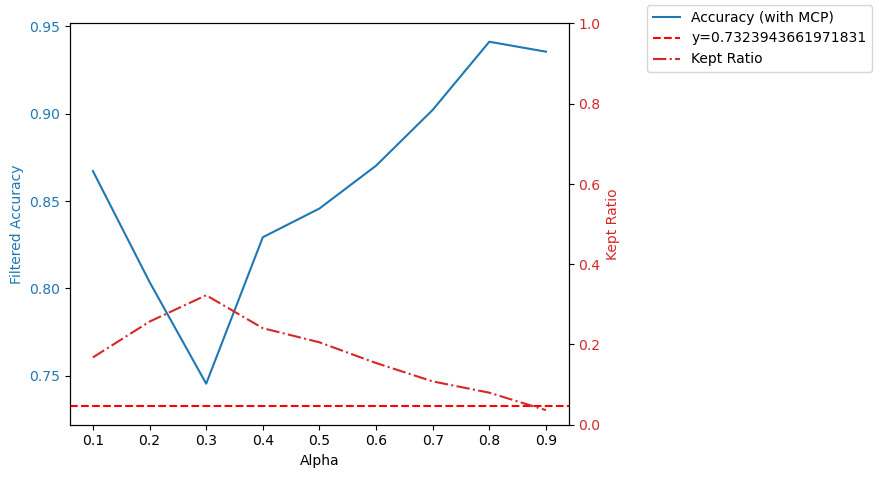

In [49]:
import matplotlib.pyplot as plt

alphas = np.arange(0.1, 1.0, 0.1)
filtered_accuracies = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_accuracies and filtered_lengths

for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = [predictions[i][0] for i in filtered_indices]
    correct = np.sum(filtered_y_test == filtered_predictions)
    filtered_accuracy = correct / len(filtered_y_test)
    
    filtered_accuracies.append(filtered_accuracy)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list


    
divisor = len(y)  # replace with the number you want to divide by

filtered_lengths = [n / divisor for n in filtered_lengths]    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Filtered Accuracy', color=color)
ax1.plot(alphas, filtered_accuracies, color=color, label='Accuracy (with MCP)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0.7323943661971831, color='r', linestyle='--', label='y=0.7323943661971831') # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color)  # we already handled the x-label with ax1
ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef
#Split data into training, calibration and testing datasets
X_train=X
y_train=y


X_calib=X_calibratedata
y_calib=y_calibratedata
X_test=X_testdata
y_test=y_testdata
# Train a RandomForestClassifier (or any other classifier)
clf = joblib.load("RFbest_model.pkl")

# Apply the classifier to the calibration set and calculate p-values
y_pred_proba_calib = clf.predict_proba(X_calib)
y_pred_proba_test = clf.predict_proba(X_test)

# Calculate the conformity scores
conformity_scores = y_pred_proba_calib[np.arange(len(y_calib)), y_calib]

# Calculate p-values for test set
p_values = []
for probas in y_pred_proba_test:
    instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
    p_values.append(instance_p_values)
p_values = np.array(p_values)
alpha=0.05

# Make predictions
predictions = [(p > alpha).nonzero()[0] for p in p_values]

# Calculate MCC
y_pred_test = clf.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred_test)

print(f'MCC without conformal prediction: {mcc}')

# Filter out uncertain predictions
filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

# Calculate MCC on remaining predictions
filtered_y_test = y_test[filtered_indices]
filtered_predictions = [predictions[i][0] for i in filtered_indices]
filtered_mcc = matthews_corrcoef(filtered_y_test, filtered_predictions)

print(f'Filtered MCC: {filtered_mcc}')

MCC without conformal prediction: 0.4481209605067215
Filtered MCC: 0.8289308176100629


In [35]:
len(y)

852

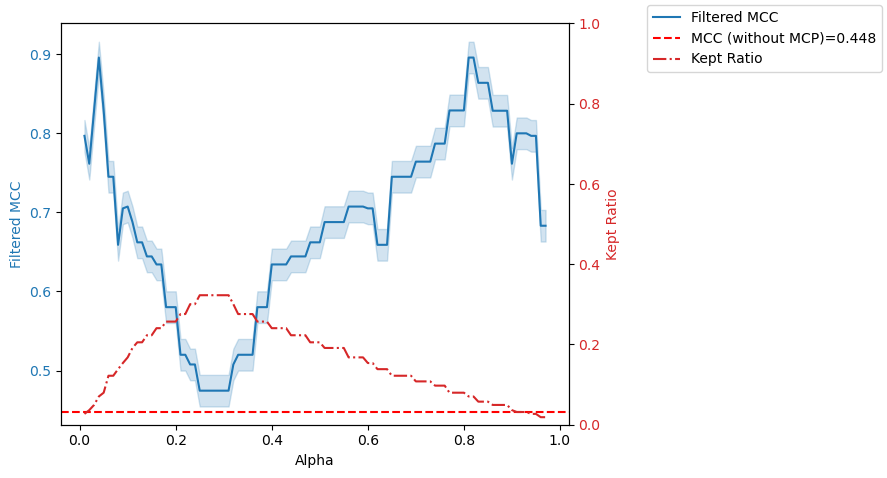

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
import numpy as np

alphas = np.arange(0.01, 0.98, 0.01)
filtered_mccs = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_mccs and filtered_lengths
for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = np.array([predictions[i][0] for i in filtered_indices])  # Convert to numpy array
    filtered_mcc = matthews_corrcoef(filtered_y_test, filtered_predictions)
    
    filtered_mccs.append(filtered_mcc)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list

divisor = len(y)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

# Generate upper and lower bounds for the confidence interval
ci_upper = np.array(filtered_mccs) + 0.02
ci_lower = np.array(filtered_mccs) - 0.02

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Filtered MCC', color=color)
ax1.plot(alphas, filtered_mccs, color=color, label='Filtered MCC')  # Add label for blue line
ax1.fill_between(alphas, ci_lower, ci_upper, color=color, alpha=0.2)  # Add confidence interval
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0.4481209605067215, color='r', linestyle='--', label='MCC (without MCP)=0.448')  # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color)  # we already handled the x-label with ax1
ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')  # Add label for red line
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()



In [52]:
alphas

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [37]:
filtered_lengths
divisor = len(y)  # replace with the number you want to divide by

filtered_lengths = [n / divisor for n in filtered_lengths]

[143, 219, 275, 205, 175, 131, 92, 68, 31]

In [38]:
nums = [143, 219, 275, 205, 175, 131, 92, 68, 31]
divisor = 10  # replace with the number you want to divide by

new_nums = [n / divisor for n in nums]

print(new_nums)

[14.3, 21.9, 27.5, 20.5, 17.5, 13.1, 9.2, 6.8, 3.1]


# XGBoost

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [59]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [60]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [61]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [62]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
import joblib
import numpy as np

# Define the classifier and the parameter grid for the grid search
clf = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None,10, 20, 30]
}

# Define the scoring function
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=mcc_scorer, return_train_score=True)

# Perform the grid search
grid_search.fit(X, y)

# Save the best model
joblib.dump(grid_search.best_estimator_, "XGBoost_best_model.pkl")

# Calculate MCC values and standard deviation for each set of parameters
mcc_values = grid_search.cv_results_['mean_test_score']
mcc_std = grid_search.cv_results_['std_test_score']

# Get best parameters
best_params = grid_search.best_params_


In [65]:
best_params

{'max_depth': 10, 'n_estimators': 100}

In [66]:
mcc_mean = np.mean(mcc_values)
mcc_mean

0.3522131870216366

In [67]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.07646268571952772

In [68]:
# Save the best model
joblib.dump(grid_search.best_estimator_, "XGboostbest_model.pkl")


['XGboostbest_model.pkl']

In [69]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.07646268571952772

In [70]:
mcc_std_mean

0.07646268571952772

In [71]:
# Get best parameters

best_params = grid_search.best_params_


In [72]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [73]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [74]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [75]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [76]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef, precision_recall_curve, auc, average_precision_score

# Load the best model
best_model = joblib.load("XGboostbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Use the model to predict probabilities on the test data
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_testdata, y_pred_proba)

# Calculate the AUC-PR
pr_auc = auc(recall, precision)

# Alternative way to calculate AUC-PR
average_precision = average_precision_score(y_testdata, y_pred_proba)

sensitivity, specificity, accuracy, mcc, f1, roc_auc, pr_auc, average_precision


(0.6859504132231405,
 0.7852760736196319,
 0.7429577464788732,
 0.4728475390834904,
 0.694560669456067,
 0.8047964305633016,
 0.7609678670201339,
 0.7621856690758672)

# tabnet

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [59]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [60]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [61]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [62]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [33]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold
import itertools
import numpy as np

# Define the parameter grid for the grid search
param_grid = {
    'n_a': [8, 16, 32],
    'n_d': [8, 16, 32]
}

# Define the scoring function
def mcc_scorer(model, X, y):
    y_pred = model.predict(X)
    return matthews_corrcoef(y, y_pred)

# 10-Fold Cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform the grid search manually
best_score = -np.inf
best_params = None
for params in itertools.product(param_grid['n_a'], param_grid['n_d']):
    n_a, n_d= params
    clf = TabNetClassifier(n_a=n_a, n_d=n_d)

    # Lists to store scores for each fold
    train_scores = []
    val_scores = []

    for train_index, val_index in kfold.split(X):
        X_train, X_val = X.values[train_index], X.values[val_index]
        y_train, y_val = y[train_index], y[val_index]
        clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric=['auc'])
        train_score = mcc_scorer(clf, X_train, y_train)
        val_score = mcc_scorer(clf, X_val, y_val)
        train_scores.append(train_score)
        val_scores.append(val_score)

    # Average score across folds
    avg_val_score = np.mean(val_scores)
    if avg_val_score > best_score:
        best_score = avg_val_score
        best_params = {'n_a': n_a, 'n_d': n_d, 
                       'optimizer_params': optimizer_params,
                       'scheduler_params': scheduler_params, 
                       'scheduler_fn': scheduler_fn}

print(f"Best parameters are: {best_params}")


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.34743 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.34743
epoch 0  | loss: 0.0     | val_0_auc: 0.50943 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.50943 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.50943 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.50943 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5094

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.60514 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.60514
epoch 0  | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5284

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 9  | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52848 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52848
epoch 0  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.51153 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51153


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.50242 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50242
epoch 0  | loss: 0.0     | val_0_auc: 0.53611 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53611 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53611 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53611 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5361

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56352
epoch 0  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52661 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52661


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.5664  |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5664
epoch 0  | loss: 0.0     | val_0_auc: 0.46055 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.46055 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.46055 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.46055 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.46055

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52229 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52229
epoch 0  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5669

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 8  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.56697 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.56697
epoch 0  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.55248 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55248


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.39939 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.39939
epoch 0  | loss: 0.0     | val_0_auc: 0.48889 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48889 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48889 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48889 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4888

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.47755 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47755
epoch 0  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5344

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 7  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.53442 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53442
epoch 0  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.53116 |  0:00:00s

Early stopping occurred at epoch 10 with be

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52867 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52867
epoch 0  | loss: 0.0     | val_0_auc: 0.46286 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.46286 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.46286 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.46286 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4628

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.41753 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.41753
epoch 0  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5466

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 7  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.54667 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54667
epoch 0  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.55111 |  0:00:00s

Early stopping occurred at epoch 10 with be

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.51719 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51719
epoch 0  | loss: 0.0     | val_0_auc: 0.44318 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.44318 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.44318 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.44318 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4431

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 10 | loss: 0.0     | val_0_auc: 0.52033 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52033
epoch 0  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.42996 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.42996


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52031 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52031
epoch 0  | loss: 0.0     | val_0_auc: 0.56229 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.56229 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.56229 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.56229 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5622

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.54095 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54095
epoch 0  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4169

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 6  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.41697 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.41697
epoch 0  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.47333 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.4733

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.48543 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48543
epoch 0  | loss: 0.0     | val_0_auc: 0.59701 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.59701 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.59701 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.59701 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5970

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.4048  |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4048
epoch 0  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5902 

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 7  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.5902  |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5902
epoch 0  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.536   |  0:00:00s

Early stopping occurred at epoch 10 with bes

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.46242 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46242
epoch 0  | loss: 0.0     | val_0_auc: 0.37082 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.37082 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.37082 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.37082 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.3708

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.61778 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.61778
epoch 0  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 4  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.53963 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53963
epoch 0  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.45815 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.4581

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.44883 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44883
epoch 0  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5089

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 6  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.50896 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50896
epoch 0  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.50429 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.5042

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.43424 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43424
epoch 0  | loss: 0.0     | val_0_auc: 0.46482 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.46482 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.46482 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.46482 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4648

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 7  | loss: 0.0     | val_0_auc: 0.57515 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.57515 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.57515 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.57515 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57515
epoch 0  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.60278 |  0:00:00s

Early stopping occurred at epoch 10 with be

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.45163 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45163
epoch 0  | loss: 0.0     | val_0_auc: 0.58149 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.58149 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.58149 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.58149 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.5814

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51111
epoch 0  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.40995 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.40995


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.50478 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50478
epoch 0  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 4  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.424   |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.424
epoch 0  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.54242 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.54242 

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.48727 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48727
epoch 0  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.4955

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 6  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.49556 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49556
epoch 0  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.56235 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.5623

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.55447 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55447
epoch 0  | loss: 0.0     | val_0_auc: 0.39994 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.39994 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.39994 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.39994 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.3999

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 3  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.46356 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46356
epoch 0  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.41143 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.4114

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 4  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.51939 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51939
epoch 0  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 4  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.38985 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.38985


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.57    |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.57
epoch 0  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.47583 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47583
epoch 0  | loss: 0.0     | val_0_auc: 0.45804 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.45804 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.45804 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.45804 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.45804 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.4580

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.47672 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47672


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.53415 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53415


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.48942 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48942


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.48626 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48626


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.48886 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48886


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.42182 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.42182


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.44406 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.44406


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.53515 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53515


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.46    |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.52855 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52855


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 0.47894 |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47894
Best parameters are: {'n_a': 16, 'n_d': 32, 'optimizer_params': {'lr': 0.001, 'weight_decay': 0.001}, 'scheduler_params': {'step_size': 50, 'gamma': 0.9}, 'scheduler_fn': <class 'torch.optim.lr_scheduler.StepLR'>}


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [37]:
# Save the best model
clf = TabNetClassifier(n_a=16, n_d=32)

#X = X.values
clf.fit(X, y)
joblib.dump(clf, "TabNetbest_model.pkl")


epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | loss: 0.0     |  0:00:00s
epoch 23 | loss: 0.0     |  0:00:00s
epoch 24 | loss: 0.0     |  0:00:00s
epoch 25 | loss: 0.0     |  0:00:00s
epoch 26 | loss: 0.0     |  0:00:00s
e

C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


['TabNetbest_model.pkl']

In [38]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [39]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [40]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [41]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [42]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Load the best model
best_model = joblib.load("TabNetbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata.values)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_testdata, y_pred)

sensitivity, specificity, accuracy, mcc, f1, roc_auc

(0.8512396694214877,
 0.1411042944785276,
 0.44366197183098594,
 -0.010771976437606426,
 0.5659340659340659,
 0.49617198195000767)

# SVM

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [46]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [47]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [48]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
import joblib
import numpy as np

# Define the classifier and the parameter grid for the grid search
clf = SVC(random_state=0)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly'],
    'probability':["True"]

}

# Define the scoring function
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=mcc_scorer, return_train_score=True)

# Perform the grid search
grid_search.fit(X, y)

# Calculate MCC values and standard deviation for each set of parameters
mcc_values = grid_search.cv_results_['mean_test_score']
mcc_std = grid_search.cv_results_['std_test_score']

# Get best parameters
best_params = grid_search.best_params_


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\s

NotFittedError: All estimators failed to fit

In [53]:
best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [19]:
clf = SVC(probability=True,C=1,gamma=0.01,kernel="rbf")
clf.fit(X, y)

SVC(C=1, gamma=0.01, probability=True)

In [54]:
mcc_mean = np.mean(mcc_values)
mcc_mean

0.30748880639615445

In [55]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.09706184573721244

In [21]:
# Save the best model
joblib.dump(clf, "SVMbest_model.pkl")


['SVMbest_model.pkl']

In [57]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.09706184573721244

In [58]:
mcc_std_mean

0.09706184573721244

In [59]:
# Get best parameters

best_params = grid_search.best_params_


In [22]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [23]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [24]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [25]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [26]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import joblib

# Load the best model
best_model = joblib.load("SVMbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Predict probabilities on the test data
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_testdata, y_pred_proba)

# Calculate the AUC-PR
pr_auc = auc(recall, precision)

# Alternative way to calculate AUC-PR
average_precision = average_precision_score(y_testdata, y_pred_proba)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'Accuracy: {accuracy}')
print(f'MCC: {mcc}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'PR AUC: {pr_auc}')
print(f'Average Precision: {average_precision}')


Sensitivity: 0.6363636363636364
Specificity: 0.7791411042944786
Accuracy: 0.7183098591549296
MCC: 0.41978333509539
F1 Score: 0.6581196581196581
ROC AUC: 0.7850225624904934
PR AUC: 0.7120668001723317
Average Precision: 0.7150627700006253


# KNN

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [23]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [24]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [25]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
import joblib
import numpy as np

# Define the classifier and the parameter grid for the grid search
clf = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Define the scoring function
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=mcc_scorer, return_train_score=True)

# Perform the grid search
grid_search.fit(X, y)

# Calculate MCC values and standard deviation for each set of parameters
mcc_values = grid_search.cv_results_['mean_test_score']
mcc_std = grid_search.cv_results_['std_test_score']

# Get best parameters
best_params = grid_search.best_params_


In [28]:
best_params

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [29]:
mcc_mean = np.mean(mcc_values)
mcc_mean

0.34372696296994776

In [30]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.09544293534162643

In [31]:
# Save the best model
joblib.dump(grid_search.best_estimator_, "KNNbest_model.pkl")


['KNNbest_model.pkl']

In [32]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.09544293534162643

In [33]:
mcc_std_mean

0.09544293534162643

In [34]:
# Get best parameters

best_params = grid_search.best_params_


In [35]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [36]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [37]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [38]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [39]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc
import joblib

# Load the best model
best_model = joblib.load("KNNbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Predict probabilities on the test data
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score using probabilities
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_testdata, y_pred_proba)

# Calculate the PR AUC
pr_auc = auc(recall, precision)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Accuracy:', accuracy)
print('MCC:', mcc)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)
print('PR AUC:', pr_auc)


Sensitivity: 0.6528925619834711
Specificity: 0.7791411042944786
Accuracy: 0.7253521126760564
MCC: 0.4352229671646951
F1 Score: 0.6694915254237288
ROC AUC: 0.7938193986716017
PR AUC: 0.7327594845514771


# lightGBM

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
import joblib

# Load the CSV file
data = pd.read_csv('trainingset_withVAEfeature.csv')
data

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J73,1,Nc1ccc(OCCCOc2ccc(N)cc2N)c(N)c1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,J1261,0,Cc1ccc2[nH]c3cc4c(=O)c5cc(C)ccc5[nH]c4cc3c(=O)...,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,J868,0,CCCCOC(=O)c1ccccc1N=Nc1c(O)c(C(=O)Nc2ccc3[nH]c...,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,J672,0,CC(=O)CC(C)=O,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,J1223,0,COc1cc2c(cc1OC)C(C)(C)C(=Cc1ccccc1)C2=O,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,J430,0,CC(C)(O)C(=O)c1ccc(Cc2ccc(C(=O)C(C)(C)O)cc2)cc1,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,A146A439,1,O=C(CS)OCC(O)CO,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,J152,0,C=CC(=O)NC(C)(C)CC(C)=O,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,J1125,0,CC(C)(C)OC(=O)NC(C(=O)N1C(C#N)CC2CC21)C12CC3CC...,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [2]:
# Delete the "ID" and "Standard.SMILES" columns
data = data.drop(["ID", "SMILES"], axis=1)
data

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-2.100618,-0.586608,-0.757279,-1.626934,0.969889,0.804786,-2.081419,-0.470079,0.690944,...,0.672588,1.392411,-0.962724,-3.221293,1.135344,-1.090479,0.343951,-1.138967,1.343337,1.649480
1,0,1.841649,-1.519976,-2.771370,-3.686444,0.170112,2.360710,1.401764,2.158487,1.981713,...,0.779203,-1.125389,0.957374,2.958723,0.945448,0.229015,-0.772842,-0.854330,-1.456528,1.970105
2,0,1.295197,-3.594815,4.557981,-1.464975,0.991180,-0.918330,-4.306161,0.391142,4.289835,...,-1.021113,-1.973245,0.911744,-1.796859,2.137618,-3.078372,0.681299,-0.618410,-2.799582,5.824892
3,0,-2.005408,1.109483,-2.211724,0.276137,-0.410392,-0.872988,-0.439920,0.723359,-0.592996,...,0.098568,0.268895,0.088722,-0.472485,-0.485460,1.054391,-2.066934,-1.671201,1.274463,-0.244277
4,0,-0.038862,-0.876821,-2.862842,-0.306383,1.282411,1.045367,1.110656,-0.156067,0.653526,...,1.090998,0.870157,-0.148083,1.347152,0.824723,-0.323375,0.210169,0.037684,-0.657290,2.336530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,-1.864373,-1.376153,-1.209296,0.768074,2.950508,-0.830250,-0.019561,0.854910,1.040295,...,-1.251800,-0.489888,1.078164,-1.696191,0.589302,0.291637,-0.940667,-0.224662,0.800405,1.988598
848,1,-1.985332,1.810128,-1.178589,0.069821,-0.786746,-0.650011,-1.116725,0.412514,0.268956,...,-0.895867,0.036081,-0.351990,-1.589763,0.079047,0.632772,-0.776116,-0.075600,0.152407,-0.701123
849,0,-2.953056,0.674710,-2.920053,0.470695,-0.286371,-0.990410,0.226200,0.298154,-0.647097,...,-0.873137,0.290267,0.236766,-0.908632,-1.080208,1.498120,-0.520171,-1.608184,0.109978,0.280874
850,0,-2.522835,-2.005080,-1.273774,-2.109453,0.280803,3.110923,1.589742,3.603571,1.516277,...,0.754477,0.005756,1.690417,-0.475381,-3.668934,0.473415,-0.035509,-0.226685,1.302121,1.873630


In [3]:
X = data.drop("label", axis=1)
y = data["label"]
y

0      1
1      0
2      0
3      0
4      0
      ..
847    0
848    1
849    0
850    0
851    0
Name: label, Length: 852, dtype: int64

In [4]:
# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [6]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
import joblib
import numpy as np

# Define the classifier and the parameter grid for the grid search
clf = lgb.LGBMClassifier()

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

# Define the scoring function
mcc_scorer = make_scorer(matthews_corrcoef)

# Define the grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring=mcc_scorer, return_train_score=True)

# Perform the grid search
grid_search.fit(X, y)

# Calculate MCC values and standard deviation for each set of parameters
mcc_values = grid_search.cv_results_['mean_test_score']
mcc_std = grid_search.cv_results_['std_test_score']

# Get best parameters
best_params = grid_search.best_params_


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_le

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning

In [7]:
best_params

{'lambda_l1': 1,
 'lambda_l2': 0,
 'min_data_in_leaf': 30,
 'num_leaves': 31,
 'reg_alpha': 0.1}

In [8]:
mcc_mean = np.mean(mcc_values)
mcc_mean

0.2849041956949974

In [9]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.0755718245362274

In [11]:
# Save the best model
joblib.dump(grid_search.best_estimator_, "LightGBMbest_model.pkl")


['LightGBMbest_model.pkl']

In [12]:
mcc_std_mean = np.mean(mcc_std)
mcc_std_mean

0.0755718245362274

In [13]:
mcc_std_mean

0.0755718245362274

In [14]:
# Get best parameters

best_params = grid_search.best_params_


In [67]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [68]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [69]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [70]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [71]:
y_testdata

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, auc
import joblib

# Load the best model
best_model = joblib.load("LightGBMbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Predict probabilities on the test data
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_testdata, y_pred_proba)

# Calculate the AUC-PR
pr_auc = auc(recall, precision)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Accuracy:', accuracy)
print('MCC:', mcc)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)
print('PR AUC:', pr_auc)


Sensitivity: 0.6611570247933884
Specificity: 0.7730061349693251
Accuracy: 0.7253521126760564
MCC: 0.43620264051494023
F1 Score: 0.6722689075630253
ROC AUC: 0.8015514881103281
PR AUC: 0.7506796957952264


# below MCP of XGBoost，first fixed calibrate and test sets

In [3]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [4]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [5]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [6]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
# Load the best model
best_model = joblib.load("XGboostbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Get predicted probabilities
y_pred_proba = best_model.predict_proba(X_testdata)[:,1]

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score with probabilities
roc_auc = roc_auc_score(y_testdata, y_pred_proba)

# Calculate the PR AUC score
pr_auc = average_precision_score(y_testdata, y_pred_proba)

sensitivity, specificity, accuracy, mcc, f1, roc_auc, pr_auc


(0.6859504132231405,
 0.7852760736196319,
 0.7429577464788732,
 0.4728475390834904,
 0.694560669456067,
 0.8047964305633016,
 0.7621856690758672)

In [8]:
# Load the CSV file
calibratedata = pd.read_csv('calibrateset_withVAEfeature.csv')
calibratedata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,A146A856,0,O=P(O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(...,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,J366,1,COc1cc(C)c2c(Oc3cccc(C(F)(F)F)c3)c(OC)cc([N+](...,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,J984,0,COc1ccc(Nc2ccc(CCNCC(O)c3ccc(O)c4[nH]c(=O)ccc3...,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,J1233,1,O=C(O)COc1cc(Cl)c(Cl)cc1Cl,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,J748,1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J719,0,COc1ncc(F)c2nc(S(=O)(=O)Nc3c(F)cccc3F)nn12,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,J1010,0,CN1C(=O)c2ccc3c4ccc5c6c(ccc(c7ccc(c2c37)C1=O)c...,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,J669,0,CCCCCCCCNC(=O)Nc1ccc(Cc2ccc(NC(=O)NCCCCCCCC)cc...,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,J923,1,CCCCCCCCCCCCCCCCCCCCBr,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [9]:
# Delete the "ID" and "Standard.SMILES" columns
calibratedata = calibratedata.drop(["ID", "SMILES"], axis=1)
calibratedata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,0,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,-0.891376,1.927723,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,1,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,-0.267281,2.702775,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,0,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,-1.223377,3.506333,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,1,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,-0.822144,1.483149,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,0.848040,1.241403,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,-0.029226,1.671207,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,0,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,6.999261,0.090455,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,0,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,-5.200621,3.133582,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,1,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,-1.870519,-0.432513,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [10]:
X_calibratedata = calibratedata.drop("label", axis=1)
y_calibratedata = calibratedata["label"]
y_calibratedata

0      0
1      1
2      0
3      1
4      1
      ..
279    0
280    0
281    0
282    1
283    1
Name: label, Length: 284, dtype: int64

In [11]:
# Encode the labels
le = LabelEncoder()
y_calibratedata = le.fit_transform(y_calibratedata)

In [12]:
y_calibratedata

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Split data into training, calibration and testing datasets


X_calib=X_calibratedata
y_calib=y_calibratedata
X_test=X_testdata
y_test=y_testdata

# Train a RandomForestClassifier (or any other classifier)
clf = joblib.load("XGboostbest_model.pkl")

# Apply the classifier to the calibration set and calculate p-values
y_pred_proba_calib = clf.predict_proba(X_calib)
y_pred_proba_test = clf.predict_proba(X_test)

# Calculate the conformity scores
conformity_scores = y_pred_proba_calib[np.arange(len(y_calib)), y_calib]

# Calculate p-values for test set
p_values = []
for probas in y_pred_proba_test:
    instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
    p_values.append(instance_p_values)
p_values = np.array(p_values)
alpha=0.7

# Make predictions
predictions = [(p > alpha).nonzero()[0] for p in p_values]

def calculate_metrics_and_accuracy(y_true, y_pred_binary, y_pred_proba):
    # Calculate Accuracy
    accuracy = np.sum(y_pred_binary == y_true) / len(y_true)
    
    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_pred_binary)

    # Calculate Sensitivity
    sensitivity = recall_score(y_true, y_pred_binary)

    # Calculate Specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    specificity = tn / (tn+fp)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # Calculate PR AUC
    pr_auc = average_precision_score(y_true, y_pred_proba)

    print(f'Accuracy: {accuracy}')
    print(f'Matthews Correlation Coefficient: {mcc}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'ROC AUC: {roc_auc}')
    print(f'PR AUC: {pr_auc}')

# Convert probabilities into binary outputs for all predictions
y_pred_test_binary = np.argmax(y_pred_proba_test, axis=1)

# Calculate metrics for all predictions
print("Metrics for all predictions:")
calculate_metrics_and_accuracy(y_test, y_pred_test_binary, y_pred_proba_test[:, 1])

# Filter out uncertain predictions
filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

# Calculate metrics for filtered predictions
filtered_y_test = y_test[filtered_indices]
filtered_y_pred_proba = y_pred_proba_test[filtered_indices, 1]
filtered_y_pred_binary = [predictions[i][0] for i in filtered_indices]

print("\nMetrics for filtered predictions:")
calculate_metrics_and_accuracy(filtered_y_test, filtered_y_pred_binary, filtered_y_pred_proba)


Metrics for all predictions:
Accuracy: 0.7429577464788732
Matthews Correlation Coefficient: 0.4728475390834904
Sensitivity: 0.6859504132231405
Specificity: 0.7852760736196319
ROC AUC: 0.8047964305633016
PR AUC: 0.7621856690758672

Metrics for filtered predictions:
Accuracy: 0.8888888888888888
Matthews Correlation Coefficient: 0.7537187825081647
Sensitivity: 0.7714285714285715
Specificity: 0.953125
ROC AUC: 0.9276785714285714
PR AUC: 0.9088008065316773


In [19]:
len(filtered_indices)/len(y_test)

0.3485915492957746

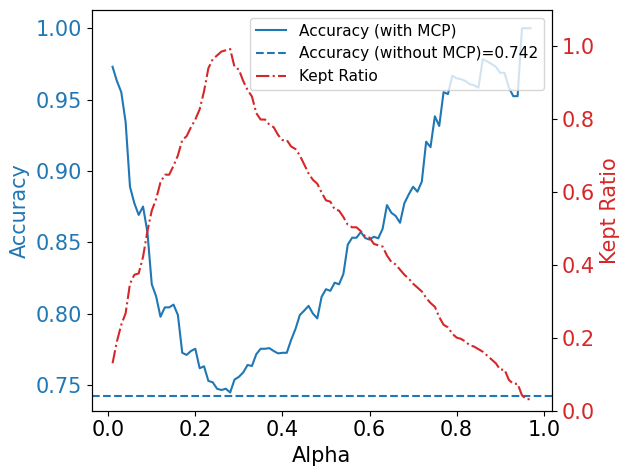

In [117]:
import matplotlib.pyplot as plt

alphas = np.arange(0.01, 0.98, 0.01)
filtered_accuracies = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_accuracies and filtered_lengths

for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = [predictions[i][0] for i in filtered_indices]
    correct = np.sum(filtered_y_test == filtered_predictions)
    filtered_accuracy = correct / len(filtered_y_test)
    
    filtered_accuracies.append(filtered_accuracy)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list


    
divisor = len(y_test)  # replace with the number you want to divide by

filtered_lengths = [n / divisor for n in filtered_lengths]    
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha',fontsize=15)
ax1.set_ylabel('Accuracy', color=color,fontsize=15)
line1, = ax1.plot(alphas, filtered_accuracies, color=color, label='Accuracy (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.742, color='tab:blue', linestyle='--', label='Accuracy (without MCP)=0.742') # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color,fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
# bbox_to_anchor can be used to specify the exact coordinates for the legend.
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11) 

# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
# set the size of the labels on the x-axis
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('accuracyMCP.pdf', format='pdf')

plt.show()

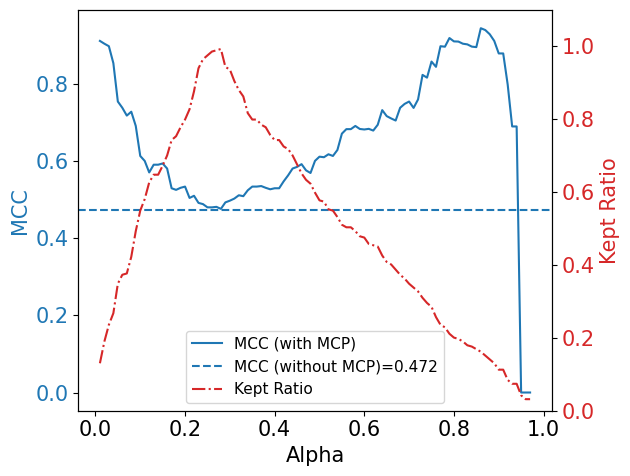

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
import numpy as np

alphas = np.arange(0.01, 0.98, 0.01)
filtered_MCCs = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_MCCs and filtered_lengths
for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = [predictions[i][0] for i in filtered_indices]
    MCC = matthews_corrcoef(filtered_y_test, filtered_predictions)
    
    filtered_MCCs.append(MCC)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list

divisor = len(y_test)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha',fontsize=15)
ax1.set_ylabel('MCC', color=color,fontsize=15)
line1, = ax1.plot(alphas, filtered_MCCs, color=color, label='MCC (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.472, color='tab:blue', linestyle='--', label='MCC (without MCP)=0.472') # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color,fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2,line3], loc='lower center', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('MCC_MCP.pdf', format='pdf')

plt.show()


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


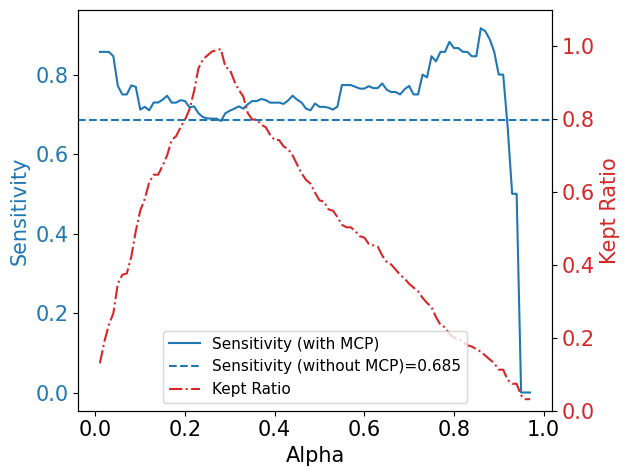

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
import numpy as np

alphas = np.arange(0.01, 0.98, 0.01)
filtered_sensitivity = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_sensitivity and filtered_lengths
for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = [predictions[i][0] for i in filtered_indices]
    sensitivity = recall_score(filtered_y_test, filtered_predictions)
    
    filtered_sensitivity.append(sensitivity)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list

divisor = len(y_test)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha',fontsize=15)
ax1.set_ylabel('Sensitivity', color=color,fontsize=15)
line1, = ax1.plot(alphas, filtered_sensitivity, color=color, label='Sensitivity (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.685, color='tab:blue', linestyle='--', label='Sensitivity (without MCP)=0.685') # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color,fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2, line3], loc='lower center', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('sensitivity_MCP.pdf', format='pdf')

plt.show()


In [39]:
filtered_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
filtered_predictions

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
alpha

0.9500000000000001

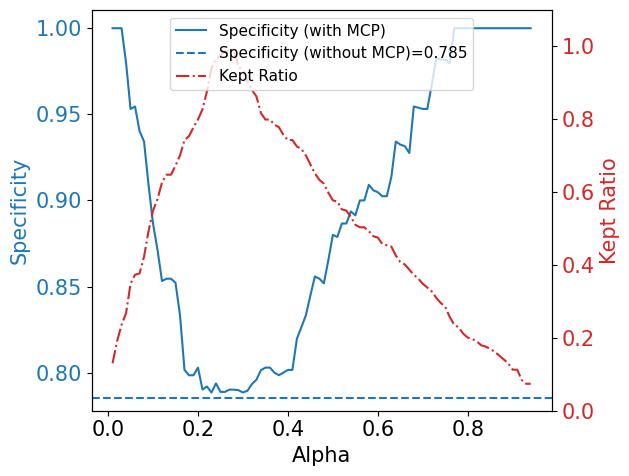

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

alphas = np.arange(0.01, 0.95, 0.01)
filtered_specificity = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# The loop and the operations for calculating the filtered_specificity and filtered_lengths
for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    filtered_y_test = y_test[filtered_indices]
    filtered_predictions = [predictions[i][0] for i in filtered_indices]
    specificity = specificity_score(filtered_y_test, filtered_predictions)
    
    filtered_specificity.append(specificity)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list

divisor = len(y_test)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha',fontsize=15)
ax1.set_ylabel('Specificity', color=color,fontsize=15)
line1, = ax1.plot(alphas, filtered_specificity, color=color, label='Specificity (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.785, color='tab:blue', linestyle='--', label='Specificity (without MCP)=0.785') # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color,fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2, line3], loc='upper center', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('specificity_MCP.pdf', format='pdf')

plt.show()


In [51]:
alpha

0.9500000000000001

In [94]:
alpha

0.9400000000000001

In [99]:
len(y_test)

284

In [101]:
filtered_indices

[12,
 14,
 15,
 24,
 75,
 114,
 134,
 165,
 182,
 186,
 189,
 197,
 205,
 220,
 225,
 237,
 240,
 243,
 266,
 273]

## ROCAUC 

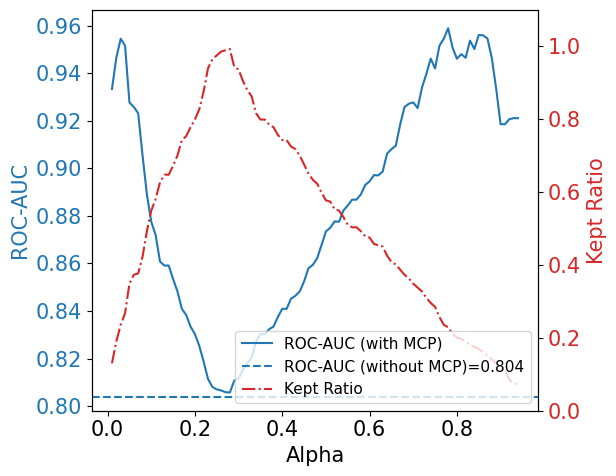

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np

alphas = np.arange(0.01, 0.95, 0.01)
filtered_auc = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# Make sure to define or replace X_calib, y_calib, X_test, y_test with your actual data

test_probabilities = clf.predict_proba(X_test) # calculate predicted probabilities for the test data

# The loop and the operations for calculating the filtered_auc and filtered_lengths
for alpha in alphas:
    

    
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
    #filtered_predictions = [predictions[i][0] for i in filtered_indices]
    
    filtered_y_test = y_test[filtered_indices]
    filtered_test_probabilities = test_probabilities[filtered_indices][:,1] # here, we are assuming that '1' is the positive class.
    auc = roc_auc_score(filtered_y_test, filtered_test_probabilities)
    
    filtered_auc.append(auc)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list


    
    
divisor = len(y_test)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha',fontsize=15)
ax1.set_ylabel('ROCAUC', color=color,fontsize=15)
line1, = ax1.plot(alphas, filtered_auc, color=color, label='AUC (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.804, color='tab:blue', linestyle='--', label='AUC (without MCP)=0.804')  # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color,fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2, line3], loc='lower right', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('AUC_MCP.pdf', format='pdf')

plt.show()


## PRAUC 

In [48]:
alpha

0.01

In [53]:
filtered_test_probabilities

array([9.7996545e-01, 9.9194068e-01, 9.8368257e-01, 9.8887235e-01,
       9.7698808e-01, 8.2081347e-04, 2.0947226e-04, 1.6321485e-03,
       1.1903738e-02, 1.2750566e-03, 7.4938545e-03, 8.7418100e-03,
       2.4051577e-02, 9.9862826e-01, 9.8487931e-01, 2.0397399e-02,
       9.8774940e-01, 1.2900323e-02, 9.7464478e-01, 1.3228261e-02,
       7.1400977e-03, 9.7311789e-01, 9.9564618e-01, 2.9160480e-03,
       2.0610467e-04, 1.1973566e-03, 1.3686498e-02, 9.8383880e-01,
       9.8814535e-01, 7.7129961e-03, 4.7931308e-03, 9.8499054e-01,
       9.8939788e-01, 9.8502272e-01, 1.7182175e-02, 1.6182097e-02,
       8.4046200e-03, 9.7385132e-01, 8.4610349e-03, 6.4978859e-04,
       9.7283506e-01, 2.3129873e-03, 2.2819452e-02, 3.1621740e-03,
       3.7924463e-03, 4.1431868e-03, 1.2434692e-03, 6.6200178e-04,
       9.9798739e-01, 5.3893944e-04, 1.5182702e-03, 1.4198692e-02,
       2.5705060e-02, 1.7621286e-02, 9.9741060e-01, 1.9476289e-02,
       4.0867073e-03, 9.9617213e-01, 1.4032434e-02, 2.4477500e

In [52]:
filtered_y_test

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [57]:
import sklearn

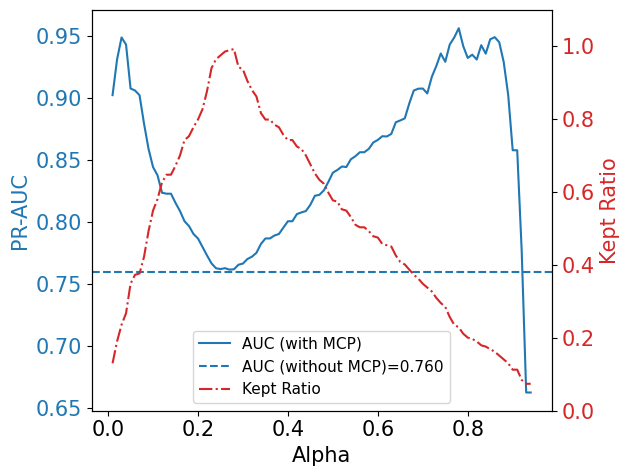

In [137]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
import numpy as np

alphas = np.arange(0.01, 0.95, 0.01)
filtered_prauc = []
filtered_lengths = []  # Stores the lengths of filtered_y_test

# Make sure to define or replace X_calib, y_calib, X_test, y_test with your actual data

test_probabilities = clf.predict_proba(X_test) # calculate predicted probabilities for the test data

# The loop and the operations for calculating the filtered_prauc and filtered_lengths
for alpha in alphas:
    predictions = [(p > alpha).nonzero()[0] for p in p_values]
    filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

    filtered_y_test = y_test[filtered_indices]
    filtered_test_probabilities = test_probabilities[filtered_indices, 1]  # here, we are assuming that '1' is the positive class.
    
    
    
    
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(filtered_y_test, filtered_test_probabilities)

    # Calculate the AUC-PR
    prauc = sklearn.metrics.auc(recall, precision)
    
    filtered_prauc.append(prauc)
    filtered_lengths.append(len(filtered_y_test))  # Add the length to the list

divisor = len(y_test)  # replace with the number you want to divide by
filtered_lengths = [n / divisor for n in filtered_lengths]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('PR-AUC', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_prauc, color=color, label='AUC (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.760, color='tab:blue', linestyle='--', label='AUC (without MCP)=0.760')  # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2, line3], loc='lower center', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('PR_AUC_MCP.pdf', format='pdf')

plt.show()


In [55]:
precision

array([0.42168675, 0.41463415, 0.41975309, 0.425     , 0.43037975,
       0.43589744, 0.44155844, 0.44736842, 0.45333333, 0.45945946,
       0.46575342, 0.47222222, 0.47887324, 0.48571429, 0.49275362,
       0.5       , 0.50746269, 0.51515152, 0.52307692, 0.53125   ,
       0.52380952, 0.53225806, 0.54098361, 0.55      , 0.55932203,
       0.56896552, 0.57894737, 0.58928571, 0.6       , 0.61111111,
       0.62264151, 0.61538462, 0.62745098, 0.64      , 0.65306122,
       0.64583333, 0.65957447, 0.67391304, 0.68888889, 0.70454545,
       0.72093023, 0.73809524, 0.75609756, 0.75      , 0.74358974,
       0.76315789, 0.78378378, 0.80555556, 0.82857143, 0.82352941,
       0.81818182, 0.84375   , 0.87096774, 0.9       , 0.89655172,
       0.89285714, 0.88888889, 0.92307692, 0.96      , 0.95833333,
       0.95652174, 0.95454545, 0.95238095, 0.95      , 0.94736842,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [54]:
recall

array([1.        , 0.97142857, 0.97142857, 0.97142857, 0.97142857,
       0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857,
       0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857,
       0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94285714, 0.94285714, 0.94285714,
       0.94285714, 0.91428571, 0.91428571, 0.91428571, 0.91428571,
       0.88571429, 0.88571429, 0.88571429, 0.88571429, 0.88571429,
       0.88571429, 0.88571429, 0.88571429, 0.85714286, 0.82857143,
       0.82857143, 0.82857143, 0.82857143, 0.82857143, 0.8       ,
       0.77142857, 0.77142857, 0.77142857, 0.77142857, 0.74285714,
       0.71428571, 0.68571429, 0.68571429, 0.68571429, 0.65714286,
       0.62857143, 0.6       , 0.57142857, 0.54285714, 0.51428571,
       0.51428571, 0.48571429, 0.45714286, 0.42857143, 0.4       ,
       0.37142857, 0.34285714, 0.31428571, 0.28571429, 0.25714

# below is MCP with regroup

In [6]:
# Load the CSV file
testdata = pd.read_csv('testset_withVAEfeature.csv')
testdata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,J589,1,CC(C=O)Cc1ccc(C(C)C)cc1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,J1020,0,NC(CSSCC(N)C(=O)O)C(=O)O,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,J250,1,ON=C1C=CCCC1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,J76,0,CC(=O)OC(C)(C)C1CC=C(C)CC1,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,J176,0,CCOc1ccc(Cc2cc(C3OC(COC(C)=O)C(OC(C)=O)C(OC(C)...,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J213,1,Cc1ccc(C(=O)CC(=O)C(F)(F)F)cc1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,A146A944,0,CC(C)C1=CC2=CCC3C(C)(CCCC34C(=O)OCC35CC4(C3)C5...,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,J1245,1,CC(CC(=O)Oc1ccc(S(=O)(=O)O)cc1)CC(C)(C)C,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,J562,1,Cc1ccc(S(=O)(=O)Cl)cc1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [7]:
# Delete the "ID" and "Standard.SMILES" columns
testdata = testdata.drop(["ID", "SMILES"], axis=1)
testdata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,1,-1.944526,1.679953,-2.263069,-0.470525,0.249186,-0.840450,1.365574,-0.930832,0.443654,...,0.522894,-0.039201,1.120057,0.136207,0.159887,1.323853,-1.276253,-1.177638,0.243265,-0.195218
1,0,-3.410791,1.217956,-1.500174,0.101256,0.263797,-0.913054,-1.829050,0.002801,0.235686,...,0.191305,-1.181099,0.855936,-3.597098,0.463224,1.423725,-0.057817,-0.422255,1.216345,0.289866
2,1,-1.666891,0.953520,-1.672517,0.315652,-0.648014,-0.291091,0.389501,-1.095691,-1.543393,...,-0.211225,0.666869,0.596529,-0.059916,-0.255318,0.566586,-0.959209,-0.534034,-0.270522,-0.566854
3,0,-3.186931,0.622285,-2.414432,-0.635803,-0.072923,-0.484286,1.473655,0.458000,-0.553194,...,0.746947,0.023469,0.416284,-0.534406,-0.604349,0.531837,-0.378896,-0.870354,0.940123,-0.181671
4,0,0.031030,-3.868598,1.339807,-1.951870,4.852596,-1.260976,-1.811481,1.305079,3.266316,...,0.496465,-4.383767,3.121762,-4.385918,0.330981,0.293457,-2.612395,0.589794,-0.142610,5.131613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-2.142985,1.025706,-1.378746,0.639232,0.792939,-0.106582,1.040964,0.430662,0.887132,...,0.347639,-0.548521,0.731523,0.754265,0.188714,0.130322,-0.328275,-0.408736,1.311963,0.595509
280,0,-1.367424,-4.310607,-3.082335,-2.644527,-2.127807,4.689502,4.298758,4.170640,-0.350662,...,2.035690,-0.323320,2.185145,2.019897,-0.735776,-0.682104,0.799981,2.202062,-0.339645,1.797208
281,1,-2.589916,-0.475639,-0.434852,-0.548444,0.531704,-1.621847,1.475111,-0.260080,1.019365,...,-1.120108,0.514395,0.869781,-1.917797,-0.470073,0.654162,0.268392,-0.284094,1.958162,1.006482
282,1,-1.470916,0.471982,-1.660401,0.372824,-0.023155,-1.554028,0.083367,0.005263,-0.340143,...,-0.382380,-0.019765,0.813334,0.883805,0.429501,1.793369,-1.722793,-0.569235,1.684254,-0.541084


In [8]:
X_testdata = testdata.drop("label", axis=1)
y_testdata = testdata["label"]
y_testdata

0      1
1      0
2      1
3      0
4      0
      ..
279    1
280    0
281    1
282    1
283    0
Name: label, Length: 284, dtype: int64

In [9]:
# Encode the labels
le = LabelEncoder()
y_testdata = le.fit_transform(y_testdata)

In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Load the best model
best_model = joblib.load("XGboostbest_model.pkl")

# Use the model to predict on the test data
y_pred = best_model.predict(X_testdata)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_testdata, y_pred).ravel()

# Calculate the sensitivity (also known as recall)
sensitivity = tp / (tp + fn)

# Calculate the specificity
specificity = tn / (tn + fp)

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate the MCC
mcc = matthews_corrcoef(y_testdata, y_pred)

# Calculate the F1 score
f1 = f1_score(y_testdata, y_pred)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_testdata, y_pred)

sensitivity, specificity, accuracy, mcc, f1, roc_auc

(0.6859504132231405,
 0.7852760736196319,
 0.7429577464788732,
 0.4728475390834904,
 0.694560669456067,
 0.7356132434213862)

In [11]:
# Load the CSV file
calibratedata = pd.read_csv('calibrateset_withVAEfeature.csv')
calibratedata

,ID,label,SMILES,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,A146A856,0,O=P(O)(C(F)(F)C(F)(F)C(F)(F)C(F)(F)F)C(F)(F)C(...,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,J366,1,COc1cc(C)c2c(Oc3cccc(C(F)(F)F)c3)c(OC)cc([N+](...,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,J984,0,COc1ccc(Nc2ccc(CCNCC(O)c3ccc(O)c4[nH]c(=O)ccc3...,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,J1233,1,O=C(O)COc1cc(Cl)c(Cl)cc1Cl,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,J748,1,CC(C)(c1ccc(OCC2CO2)cc1)c1ccc(OCC2CO2)cc1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,J719,0,COc1ncc(F)c2nc(S(=O)(=O)Nc3c(F)cccc3F)nn12,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,J1010,0,CN1C(=O)c2ccc3c4ccc5c6c(ccc(c7ccc(c2c37)C1=O)c...,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,J669,0,CCCCCCCCNC(=O)Nc1ccc(Cc2ccc(NC(=O)NCCCCCCCC)cc...,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,J923,1,CCCCCCCCCCCCCCCCCCCCBr,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [12]:
# Delete the "ID" and "Standard.SMILES" columns
calibratedata = calibratedata.drop(["ID", "SMILES"], axis=1)
calibratedata

,label,VAE1,VAE2,VAE3,VAE4,VAE5,VAE6,VAE7,VAE8,VAE9,...,VAE55,VAE56,VAE57,VAE58,VAE59,VAE60,VAE61,VAE62,VAE63,VAE64
0,0,-6.297600,-0.822608,2.452361,-0.973581,6.483719,0.028990,-3.010179,-0.891376,1.927723,...,-1.714819,-0.324293,7.400153,3.084848,-0.291137,-8.314127,0.249699,3.732142,0.412777,1.908427
1,1,0.529082,-1.445265,-1.143914,-1.435479,2.655970,0.472386,0.534045,-0.267281,2.702775,...,0.372871,-0.312034,1.059776,1.374808,1.375413,-1.479548,0.255390,-2.243650,-0.729925,3.473336
2,0,1.568929,-2.726032,5.142622,-1.201478,2.876397,0.048344,-4.289927,-1.223377,3.506333,...,-0.762330,-0.764384,0.296737,-2.113058,3.116693,-3.642116,0.170152,-0.070952,-2.316049,5.211063
3,1,-1.990606,0.037749,-1.960557,1.163630,0.312563,-0.930590,-0.930519,-0.822144,1.483149,...,-0.447655,0.451342,0.210338,1.154542,1.097572,1.459506,0.199595,-0.599242,-0.955443,-0.131165
4,1,-0.930183,-1.852474,0.481864,-1.038078,1.032902,2.464568,0.288785,0.848040,1.241403,...,1.990893,0.986807,-0.769798,0.481696,-0.007820,-1.945025,-1.718904,-0.639044,1.502226,1.076954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.184687,-0.873185,0.207525,-0.286027,0.467316,-0.721434,0.516907,-0.029226,1.671207,...,-1.590053,1.627042,0.470458,2.711415,-0.379744,-2.500527,1.239445,0.401814,0.136007,1.794133
280,0,3.521303,-2.799086,-6.011129,-4.288428,-0.999215,6.404498,1.464840,6.999261,0.090455,...,-0.061732,-2.774574,0.030254,4.881628,-3.806252,-2.175217,-1.807941,1.832099,-4.679526,4.787452
281,0,-2.854196,-3.845268,8.141615,-3.648489,1.329216,-3.262791,-8.362792,-5.200621,3.133582,...,-2.064050,-2.920292,4.253309,-9.365771,3.795737,-4.039011,0.278838,3.232860,-1.071337,5.643922
282,1,-7.333440,-1.302337,0.327452,-5.243084,-1.552685,-5.003287,-3.593447,-1.870519,-0.432513,...,-3.039089,-0.804090,4.343425,-3.680332,3.348496,-2.611673,0.869662,0.758130,-0.610623,-0.077603


In [13]:
X_calibratedata = calibratedata.drop("label", axis=1)
y_calibratedata = calibratedata["label"]
y_calibratedata

0      0
1      1
2      0
3      1
4      1
      ..
279    0
280    0
281    0
282    1
283    1
Name: label, Length: 284, dtype: int64

In [14]:
# Encode the labels
le = LabelEncoder()
y_calibratedata = le.fit_transform(y_calibratedata)

In [15]:
y_calibratedata

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#Split data into training, calibration and testing datasets


X_calib=X_calibratedata
y_calib=y_calibratedata
X_test=X_testdata
y_test=y_testdata

# Train a RandomForestClassifier (or any other classifier)
clf = joblib.load("XGboostbest_model.pkl")

# Apply the classifier to the calibration set and calculate p-values
y_pred_proba_calib = clf.predict_proba(X_calib)
y_pred_proba_test = clf.predict_proba(X_test)

# Calculate the conformity scores
conformity_scores = y_pred_proba_calib[np.arange(len(y_calib)), y_calib]

# Calculate p-values for test set
p_values = []
for probas in y_pred_proba_test:
    instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
    p_values.append(instance_p_values)
p_values = np.array(p_values)
alpha=0.3

# Make predictions
predictions = [(p > alpha).nonzero()[0] for p in p_values]

# Calculate accuracy
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test) / len(y_test)

print(f'Accuracy without conformal prediction: {accuracy}')

# Filter out uncertain predictions
filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

# Calculate accuracy on remaining predictions
filtered_y_test = y_test[filtered_indices]
filtered_predictions = [predictions[i][0] for i in filtered_indices]
correct = np.sum(filtered_y_test == filtered_predictions)

print(f'Filtered accuracy: {correct / len(filtered_y_test)}')


Accuracy without conformal prediction: 0.7429577464788732
Filtered accuracy: 0.7556390977443609


In [17]:
from sklearn.model_selection import train_test_split

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

# split combined data into new calibration and test sets
X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

# then use these new sets in the rest of your code
y_pred_proba_calib = clf.predict_proba(X_new_calib)
y_pred_proba_test = clf.predict_proba(X_new_test)

# Calculate the conformity scores
conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

# Calculate p-values for test set
p_values = []
for probas in y_pred_proba_test:
    instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
    p_values.append(instance_p_values)
p_values = np.array(p_values)



In [18]:
len(filtered_lengths)

NameError: name 'filtered_lengths' is not defined

## accuracy 

In [ ]:

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('PR-AUC', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_prauc, color=color, label='AUC (with MCP)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
line2 = ax1.axhline(y=0.760, color='tab:blue', linestyle='--', label='AUC (without MCP)=0.760')  # Add horizontal line

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)  # we already handled the x-label with ax1
line3, = ax2.plot(alphas, filtered_lengths, color=color, linestyle='-.', label='Kept Ratio')
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Setting the legend inside the plot. loc='upper right' or 'lower right' or 'upper left' or 'lower left' are common choices.
plt.legend(handles=[line1, line2, line3], loc='lower center', fontsize=11) 
ax1.tick_params(axis='x', labelsize=15)
# Saving the figure as a PDF. You can replace 'output.pdf' with your desired filename. 
plt.savefig('PR_AUC_MCP.pdf', format='pdf')

plt.show()

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97


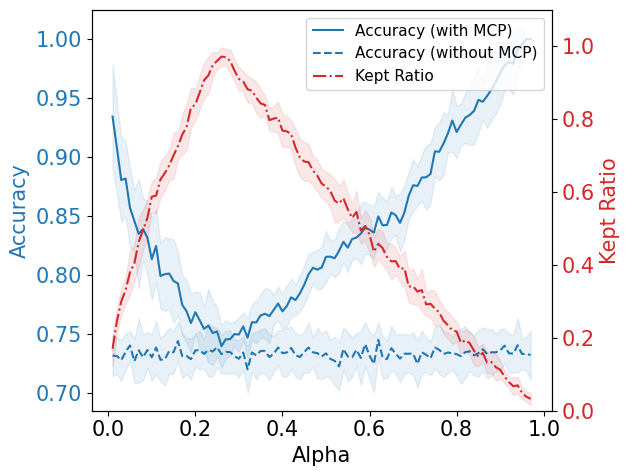

In [152]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

iterations = 20
alphas = np.arange(0.01, 0.98, 0.01)

filtered_accuracies = []
filtered_lengths = []

all_accuracies = []
kept_ratios = []

all_accuracies_iters = []
filtered_accuracies_iters = []
kept_ratios_iters = []

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_accuracies_alpha = []
    filtered_lengths_alpha = []
    accuracies = []
    kept_ratios_alpha = []
    
    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

        # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = [predictions[i][0] for i in filtered_indices]
        correct = np.sum(filtered_y_test == filtered_predictions)
        filtered_accuracy = correct / len(filtered_y_test)
    
        filtered_accuracies_alpha.append(filtered_accuracy)
        filtered_lengths_alpha.append(len(filtered_y_test))
        
        # Calculate accuracy
        y_pred_test = clf.predict(X_new_test)
        accuracy = np.sum(y_pred_test == y_new_test) / len(y_new_test)
        accuracies.append(accuracy)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_accuracies.append(np.mean(filtered_accuracies_alpha))
    filtered_lengths.append(np.mean(filtered_lengths_alpha))
    all_accuracies.append(np.mean(accuracies))
    kept_ratios.append(np.mean(kept_ratios_alpha))
    
    filtered_accuracies_iters.append(filtered_accuracies_alpha)
    all_accuracies_iters.append(accuracies)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_accuracies_sd = [np.std(acc) for acc in filtered_accuracies_iters]
all_accuracies_sd = [np.std(acc) for acc in all_accuracies_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('Accuracy', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_accuracies, color=color, label='Accuracy (with MCP)')
ax1.fill_between(alphas, np.array(filtered_accuracies) - np.array(filtered_accuracies_sd),
                 np.array(filtered_accuracies) + np.array(filtered_accuracies_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_accuracies, color='tab:blue', linestyle='--', label='Accuracy (without MCP)')
ax1.fill_between(alphas, np.array(all_accuracies) - np.array(all_accuracies_sd),
                 np.array(all_accuracies) + np.array(all_accuracies_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_Accuracy_AUC_MCP.pdf', format='pdf')
plt.show()


## MCC 

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97


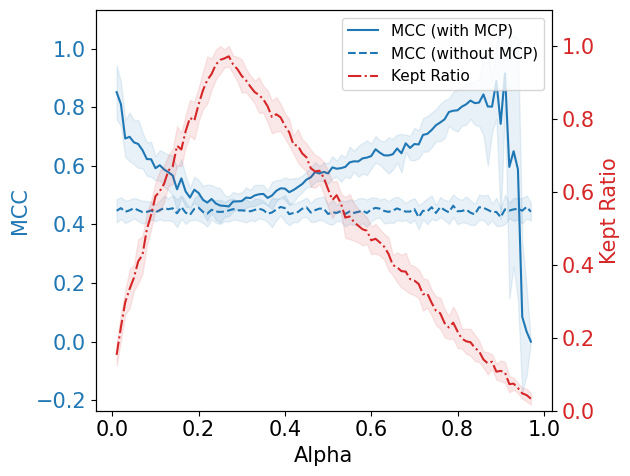

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import matthews_corrcoef

iterations = 20
alphas = np.arange(0.01, 0.98, 0.01)

filtered_mccs = []
all_mccs = []
kept_ratios = []

filtered_mccs_iters = []
all_mccs_iters = []
kept_ratios_iters = []

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_mccs_alpha = []
    all_mccs_alpha = []
    kept_ratios_alpha = []
    
    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

        # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = [predictions[i][0] for i in filtered_indices]

        # Calculate MCC
        mcc_filtered = matthews_corrcoef(filtered_y_test, filtered_predictions)
        filtered_mccs_alpha.append(mcc_filtered)

        # Calculate MCC for all predictions
        y_pred_test = clf.predict(X_new_test)
        mcc = matthews_corrcoef(y_new_test, y_pred_test)
        all_mccs_alpha.append(mcc)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_mccs.append(np.mean(filtered_mccs_alpha))
    all_mccs.append(np.mean(all_mccs_alpha))
    kept_ratios.append(np.mean(kept_ratios_alpha))
    
    filtered_mccs_iters.append(filtered_mccs_alpha)
    all_mccs_iters.append(all_mccs_alpha)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_mccs_sd = [np.std(mcc) for mcc in filtered_mccs_iters]
all_mccs_sd = [np.std(mcc) for mcc in all_mccs_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('MCC', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_mccs, color=color, label='MCC (with MCP)')
ax1.fill_between(alphas, np.array(filtered_mccs) - np.array(filtered_mccs_sd),
                 np.array(filtered_mccs) + np.array(filtered_mccs_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_mccs, color='tab:blue', linestyle='--', label='MCC (without MCP)')
ax1.fill_between(alphas, np.array(all_mccs) - np.array(all_mccs_sd),
                 np.array(all_mccs) + np.array(all_mccs_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_MCC_MCP.pdf', format='pdf')
plt.show()


## sensitivity-recall

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.92
0.93


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\skl

0.9400000000000001


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\skl

0.9500000000000001


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\skl

0.9600000000000001


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\skl

0.97


C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Localadmin_weikaixi\anaconda3\envs\py37\lib\site-packages\skl

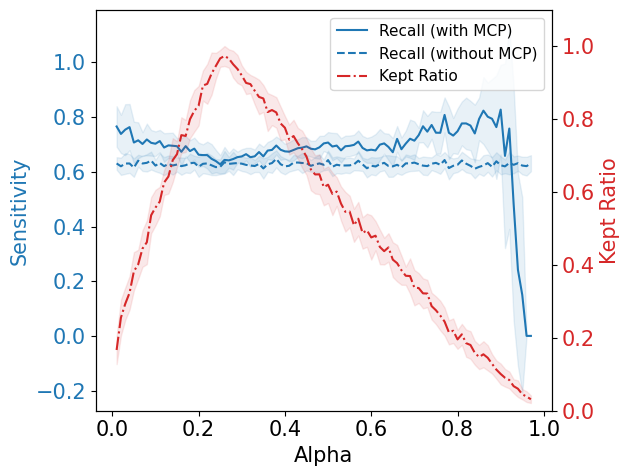

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score

iterations = 20
alphas = np.arange(0.01, 0.98, 0.01)

filtered_recalls = []
all_recalls = []
kept_ratios = []

filtered_recalls_iters = []
all_recalls_iters = []
kept_ratios_iters = []

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_recalls_alpha = []
    all_recalls_alpha = []
    kept_ratios_alpha = []
    
    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

        # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = [predictions[i][0] for i in filtered_indices]

        # Calculate Recall
        recall_filtered = recall_score(filtered_y_test, filtered_predictions)
        filtered_recalls_alpha.append(recall_filtered)

        # Calculate Recall for all predictions
        y_pred_test = clf.predict(X_new_test)
        recall = recall_score(y_new_test, y_pred_test)
        all_recalls_alpha.append(recall)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_recalls.append(np.mean(filtered_recalls_alpha))
    all_recalls.append(np.mean(all_recalls_alpha))
    kept_ratios.append(np.mean(kept_ratios_alpha))
    
    filtered_recalls_iters.append(filtered_recalls_alpha)
    all_recalls_iters.append(all_recalls_alpha)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_recalls_sd = [np.std(recall) for recall in filtered_recalls_iters]
all_recalls_sd = [np.std(recall) for recall in all_recalls_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('Sensitivity', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_recalls, color=color, label='Recall (with MCP)')
ax1.fill_between(alphas, np.array(filtered_recalls) - np.array(filtered_recalls_sd),
                 np.array(filtered_recalls) + np.array(filtered_recalls_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_recalls, color='tab:blue', linestyle='--', label='Recall (without MCP)')
ax1.fill_between(alphas, np.array(all_recalls) - np.array(all_recalls_sd),
                 np.array(all_recalls) + np.array(all_recalls_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_Sensitivity_MCP.pdf', format='pdf')
plt.show()


## specificity 

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9


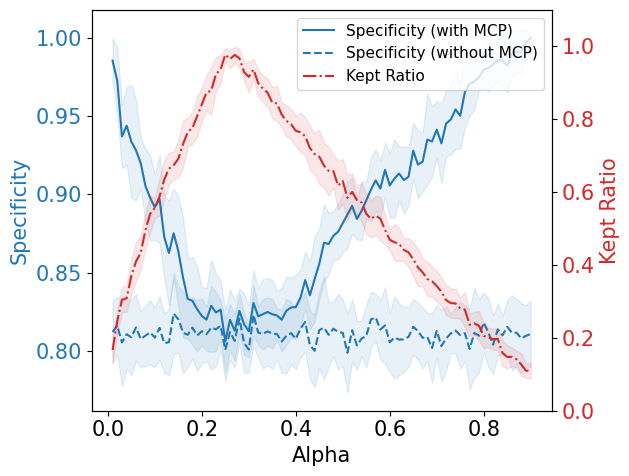

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity

iterations = 20
alphas = np.arange(0.01, 0.91, 0.01)

filtered_specificities = []
all_specificities = []
kept_ratios = []

filtered_specificities_iters = []
all_specificities_iters = []
kept_ratios_iters = []

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_specificities_alpha = []
    all_specificities_alpha = []
    kept_ratios_alpha = []
    
    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

        # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = [predictions[i][0] for i in filtered_indices]

        # Calculate Specificity
        specificity_filtered = specificity_score(filtered_y_test, filtered_predictions)
        filtered_specificities_alpha.append(specificity_filtered)

        # Calculate Specificity for all predictions
        y_pred_test = clf.predict(X_new_test)
        specificity = specificity_score(y_new_test, y_pred_test)
        all_specificities_alpha.append(specificity)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_specificities.append(np.mean(filtered_specificities_alpha))
    all_specificities.append(np.mean(all_specificities_alpha))
    kept_ratios.append(np.mean(kept_ratios_alpha))
    
    filtered_specificities_iters.append(filtered_specificities_alpha)
    all_specificities_iters.append(all_specificities_alpha)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_specificities_sd = [np.std(specificity) for specificity in filtered_specificities_iters]
all_specificities_sd = [np.std(specificity) for specificity in all_specificities_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('Specificity', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_specificities, color=color, label='Specificity (with MCP)')
ax1.fill_between(alphas, np.array(filtered_specificities) - np.array(filtered_specificities_sd),
                 np.array(filtered_specificities) + np.array(filtered_specificities_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_specificities, color='tab:blue', linestyle='--', label='Specificity (without MCP)')
ax1.fill_between(alphas, np.array(all_specificities) - np.array(all_specificities_sd),
                 np.array(all_specificities) + np.array(all_specificities_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_SepcificityMCP.pdf', format='pdf')
plt.show()


## ROCAUC 

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9


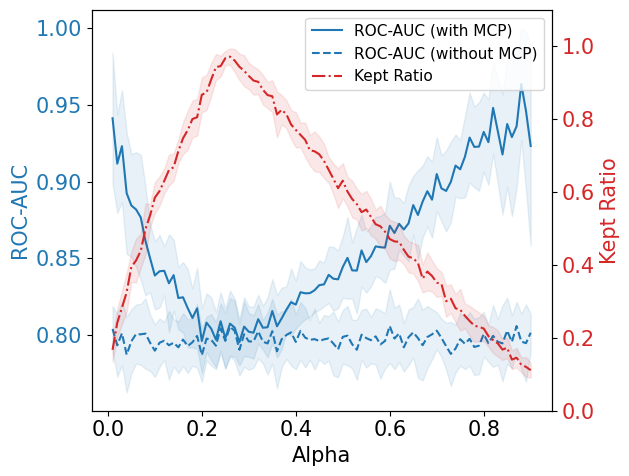

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

iterations = 20
alphas = np.arange(0.01, 0.91, 0.01)

filtered_rocaucs = []
all_rocaucs = []
kept_ratios = []

filtered_rocaucs_iters = []
all_rocaucs_iters = []
kept_ratios_iters = []








# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_rocaucs_alpha = []
    all_rocaucs_alpha = []
    kept_ratios_alpha = []
    
    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

               # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]
        
        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = y_pred_proba_test[filtered_indices][:,1]

        # Calculate ROC AUC
        rocauc_filtered = roc_auc_score(filtered_y_test, filtered_predictions)
        filtered_rocaucs_alpha.append(rocauc_filtered)

        # Calculate ROC AUC for all predictions
        rocauc = roc_auc_score(y_new_test, y_pred_proba_test[:,1])
        all_rocaucs_alpha.append(rocauc)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_rocaucs.append(np.mean(filtered_rocaucs_alpha))
    all_rocaucs.append(np.mean(all_rocaucs_alpha))
    kept_ratios.append(np.mean(kept_ratios_alpha))
    
    filtered_rocaucs_iters.append(filtered_rocaucs_alpha)
    all_rocaucs_iters.append(all_rocaucs_alpha)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_rocaucs_sd = [np.std(rocauc) for rocauc in filtered_rocaucs_iters]
all_rocaucs_sd = [np.std(rocauc) for rocauc in all_rocaucs_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('ROC-AUC', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_rocaucs, color=color, label='ROC-AUC (with MCP)')
ax1.fill_between(alphas, np.array(filtered_rocaucs) - np.array(filtered_rocaucs_sd),
                 np.array(filtered_rocaucs) + np.array(filtered_rocaucs_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_rocaucs, color='tab:blue', linestyle='--', label='ROC-AUC (without MCP)')
ax1.fill_between(alphas, np.array(all_rocaucs) - np.array(all_rocaucs_sd),
                 np.array(all_rocaucs) + np.array(all_rocaucs_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_ROCAUC_MCP.pdf', format='pdf')
plt.show()


0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9


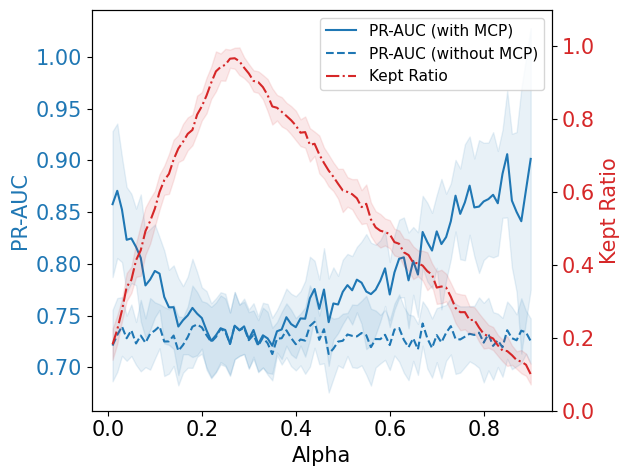

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

iterations = 20
alphas = np.arange(0.01, 0.91, 0.01)

filtered_praucs = []
all_praucs = []
kept_ratios = []

filtered_praucs_iters = []
all_praucs_iters = []
kept_ratios_iters = []

# combine calibration and test data
X_combined = np.concatenate((X_calib, X_test), axis=0)
y_combined = np.concatenate((y_calib, y_test), axis=0)

for alpha in alphas:
    print(alpha)
    filtered_praucs_alpha = []
    all_praucs_alpha = []
    kept_ratios_alpha = []

    for _ in range(iterations):
        # split combined data into new calibration and test sets
        X_new_calib, X_new_test, y_new_calib, y_new_test = train_test_split(X_combined, y_combined, test_size=0.5)

        # then use these new sets in the rest of your code
        y_pred_proba_calib = clf.predict_proba(X_new_calib)
        y_pred_proba_test = clf.predict_proba(X_new_test)

        # Calculate the conformity scores
        conformity_scores = y_pred_proba_calib[np.arange(len(y_new_calib)), y_new_calib]

        # Calculate p-values for test set
        p_values = []
        for probas in y_pred_proba_test:
            instance_p_values = [np.mean(proba >= conformity_scores) for proba in probas]
            p_values.append(instance_p_values)
        p_values = np.array(p_values)

        predictions = [(p > alpha).nonzero()[0] for p in p_values]
        filtered_indices = [i for i, prediction in enumerate(predictions) if len(prediction) == 1]

        filtered_y_test = y_new_test[filtered_indices]
        filtered_predictions = y_pred_proba_test[filtered_indices][:,1]

        # Calculate PR AUC
        prauc_filtered = average_precision_score(filtered_y_test, filtered_predictions)
        filtered_praucs_alpha.append(prauc_filtered)

        # Calculate PR AUC for all predictions
        prauc = average_precision_score(y_new_test, y_pred_proba_test[:,1])
        all_praucs_alpha.append(prauc)

        # Calculate kept ratio
        kept_ratio = len(filtered_y_test) / len(y_new_test)
        kept_ratios_alpha.append(kept_ratio)
    
    filtered_praucs.append(np.mean(filtered_praucs_alpha))
    all_praucs.append(np.mean(all_praucs_alpha))
    kept_ratios.append(np.mean(kept_ratios_alpha))

    filtered_praucs_iters.append(filtered_praucs_alpha)
    all_praucs_iters.append(all_praucs_alpha)
    kept_ratios_iters.append(kept_ratios_alpha)

# calculate standard deviation
filtered_praucs_sd = [np.std(prauc) for prauc in filtered_praucs_iters]
all_praucs_sd = [np.std(prauc) for prauc in all_praucs_iters]
kept_ratios_sd = [np.std(ratio) for ratio in kept_ratios_iters]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Alpha', fontsize=15)
ax1.set_ylabel('PR-AUC', color=color, fontsize=15)
line1, = ax1.plot(alphas, filtered_praucs, color=color, label='PR-AUC (with MCP)')
ax1.fill_between(alphas, np.array(filtered_praucs) - np.array(filtered_praucs_sd),
                 np.array(filtered_praucs) + np.array(filtered_praucs_sd), color=color, alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)

line2, = ax1.plot(alphas, all_praucs, color='tab:blue', linestyle='--', label='PR-AUC (without MCP)')
ax1.fill_between(alphas, np.array(all_praucs) - np.array(all_praucs_sd),
                 np.array(all_praucs) + np.array(all_praucs_sd), color='tab:blue', alpha=0.1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim([0, 1.1])
color = 'tab:red'
ax2.set_ylabel('Kept Ratio', color=color, fontsize=15)
line3, = ax2.plot(alphas, kept_ratios, color=color, linestyle='-.', label='Kept Ratio')
ax2.fill_between(alphas, np.array(kept_ratios) - np.array(kept_ratios_sd),
                 np.array(kept_ratios) + np.array(kept_ratios_sd), color=color, alpha=0.1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

fig.tight_layout()
plt.legend(handles=[line1, line2, line3], loc='upper right', fontsize=11)
ax1.tick_params(axis='x', labelsize=15)
plt.savefig('regroup_PRAUC_MCP.pdf', format='pdf')
plt.show()
